In [20]:
# 1.Import the necessary libraries for the assessment 

In [21]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import random 
sns.set()

from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

In [22]:
# 2.Load the healthcare data stroke into the pandas DataFrame

In [23]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [24]:
# 3.Explore the healthcare data stroke to identiy issues 

In [25]:
dataset.shape

(5110, 12)

In [26]:
dataset.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [28]:
dataset.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [29]:
dataset.describe(include='all')

id  gender          age  hypertension  heart_disease  \
count    5110.000000    5110  5110.000000   5110.000000    5110.000000   
unique           NaN       3          NaN           NaN            NaN   
top              NaN  Female          NaN           NaN            NaN   
freq             NaN    2994          NaN           NaN            NaN   
mean    36517.829354     NaN    43.226614      0.097456       0.054012   
std     21161.721625     NaN    22.612647      0.296607       0.226063   
min        67.000000     NaN     0.080000      0.000000       0.000000   
25%     17741.250000     NaN    25.000000      0.000000       0.000000   
50%     36932.000000     NaN    45.000000      0.000000       0.000000   
75%     54682.000000     NaN    61.000000      0.000000       0.000000   
max     72940.000000     NaN    82.000000      1.000000       1.000000   

       ever_married work_type Residence_type  avg_glucose_level          bmi  \
count          5110      5110           5110        5110.000000  4909.000000   
unique            2         5              2                NaN          NaN   
top             Yes   Private          Urban                NaN          NaN   
freq           3353      2925           2596                NaN          NaN   
mean            NaN       NaN            NaN         106.147677    28.893237   
std             NaN       NaN            NaN          45.283560     7.854067   
min             NaN       NaN            NaN          55.120000    10.300000   
25%             NaN       NaN            NaN          77.245000    23.500000   
50%             NaN       NaN            NaN          91.885000    28.100000   
75%             NaN       NaN            NaN         114.090000    33.100000   
max             NaN       NaN            NaN         271.740000    97.600000   

       smoking_status       stroke  
count            5110  5110.000000  
unique              4          NaN  
top      never smoked          NaN  
freq             1892          NaN  
mean              NaN     0.048728  
std               NaN     0.215320  
min               NaN     0.000000  
25%               NaN     0.000000  
50%               NaN     0.000000  
75%               NaN     0.000000  
max               NaN     1.000000

In [30]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [31]:
# 4.Handling the missing healthcare data stroke values

In [32]:
data = dataset.dropna()
print(data)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
5     56669    Male  81.0             0              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5104  14180  Female  13.0             0              0           No   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [33]:
# 5.Replace 'N/A' with actual NaN values 

In [34]:
dataset['bmi'] = dataset['bmi'].replace('N/A', pd.NA)

In [35]:
# 6.Remove rows with NaN values in the 'bmi' column

In [36]:
dataset = dataset.dropna(subset=['bmi'])

In [37]:
# 7.Remove healthcare data stroke duplicate rows 

In [38]:
dataset = dataset.drop_duplicates()

In [39]:
# 8.Initial visualization of the data 

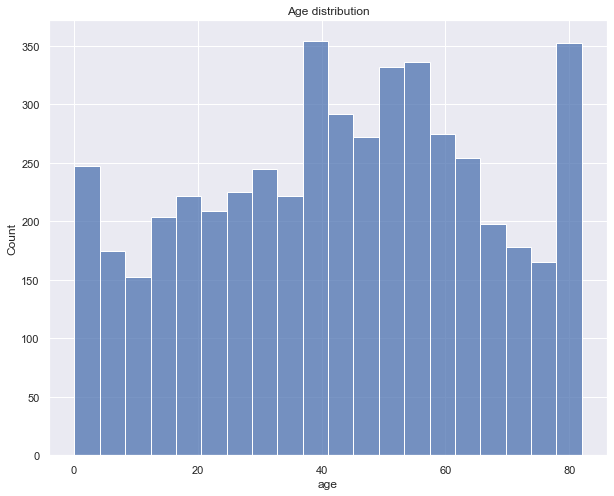

In [40]:
plt.figure(figsize=(10, 8))
sns.histplot(dataset.age)
plt.title('Age distribution')
plt.show()

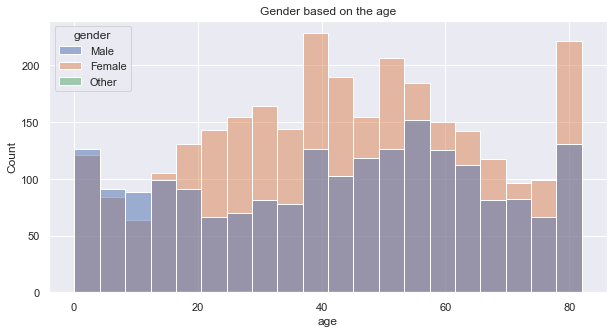

In [41]:
plt.figure(figsize=(10, 5))
plt.title("Gender based on the age")
sns.histplot(x="age", hue="gender", data=dataset)
plt.show()

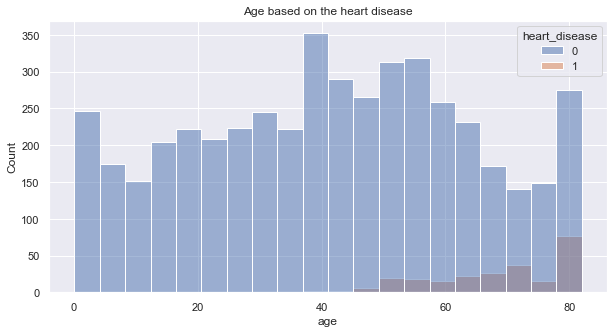

In [42]:
plt.figure(figsize=(10, 5))
plt.title("Age based on the heart disease")
sns.histplot(x="age", hue="heart_disease", data=dataset)
plt.show()

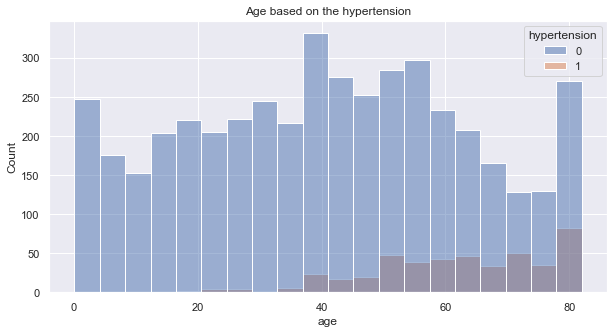

In [43]:
plt.figure(figsize=(10, 5))
plt.title("Age based on the hypertension")
sns.histplot(x="age", hue="hypertension", data=dataset)
plt.show()

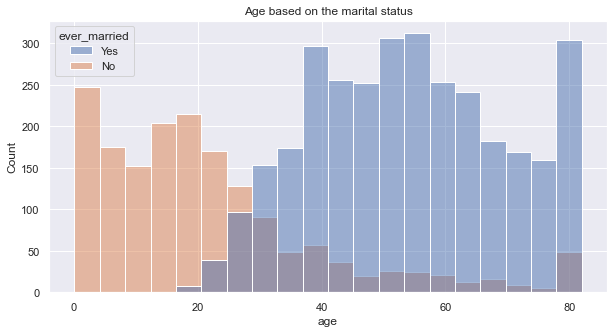

In [44]:
plt.figure(figsize=(10, 5))
plt.title("Age based on the marital status")
sns.histplot(x="age", hue="ever_married", data=dataset)
plt.show()

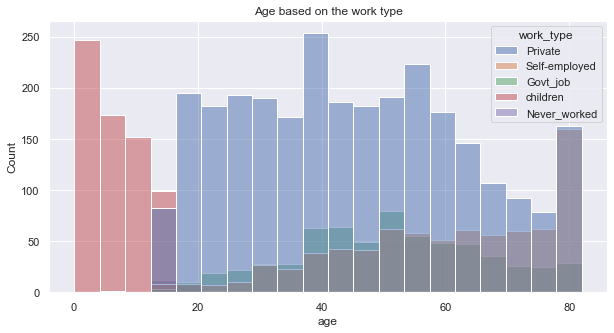

In [45]:
plt.figure(figsize=(10, 5))
plt.title("Age based on the work type")
sns.histplot(x="age", hue="work_type", data=dataset)
plt.show()

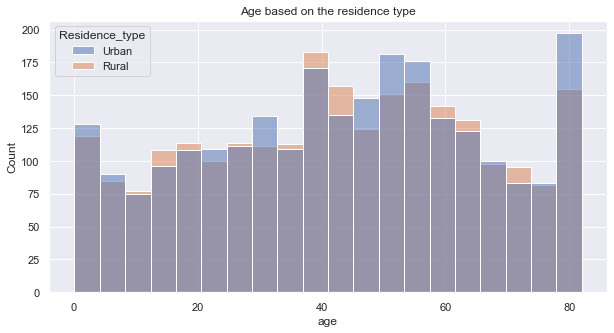

In [46]:
plt.figure(figsize=(10, 5))
plt.title("Age based on the residence type")
sns.histplot(x="age", hue="Residence_type", data=dataset)
plt.show()

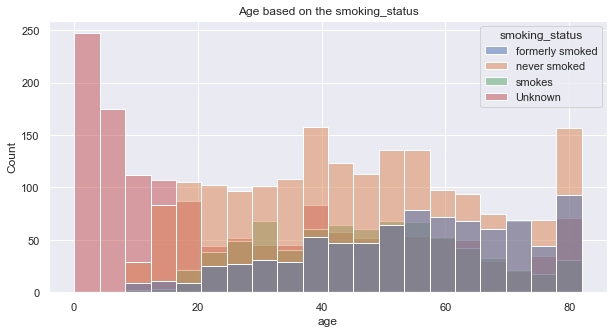

In [47]:
plt.figure(figsize=(10, 5))
plt.title("Age based on the smoking_status")
sns.histplot(x="age", hue="smoking_status", data=dataset)
plt.show()

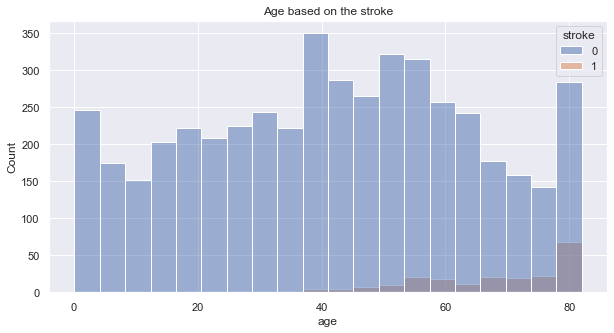

In [48]:
plt.figure(figsize=(10, 5))
plt.title("Age based on the stroke")
sns.histplot(x="age", hue="stroke", data=dataset)
plt.show()

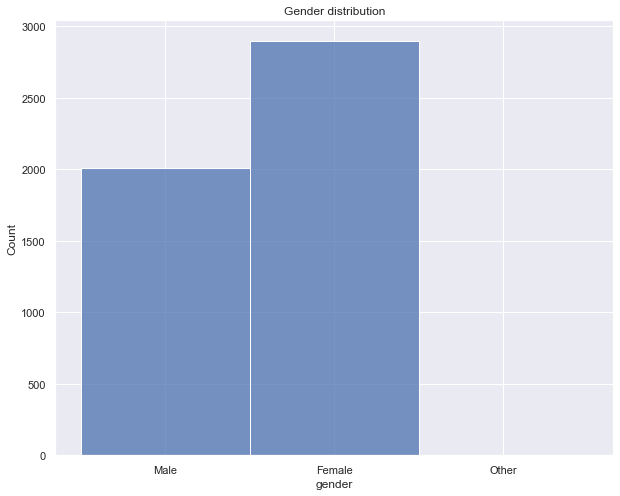

In [49]:
plt.figure(figsize=(10, 8))
sns.histplot(dataset.gender)
plt.title('Gender distribution')
plt.show()

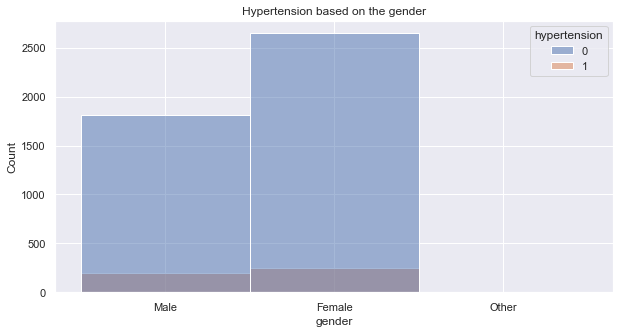

In [50]:
plt.figure(figsize=(10, 5))
plt.title("Hypertension based on the gender")
sns.histplot(x="gender", hue="hypertension", data=dataset)
plt.show()

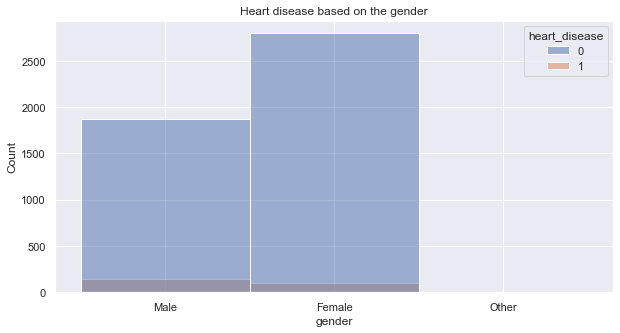

In [51]:
plt.figure(figsize=(10, 5))
plt.title("Heart disease based on the gender")
sns.histplot(x="gender", hue="heart_disease", data=dataset)
plt.show()

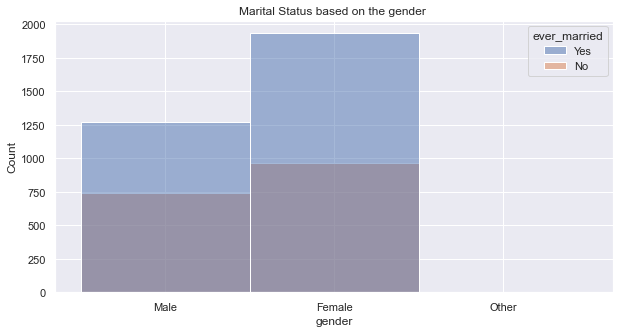

In [52]:
plt.figure(figsize=(10, 5))
plt.title("Marital Status based on the gender ")
sns.histplot(x="gender", hue="ever_married", data=dataset)
plt.show()

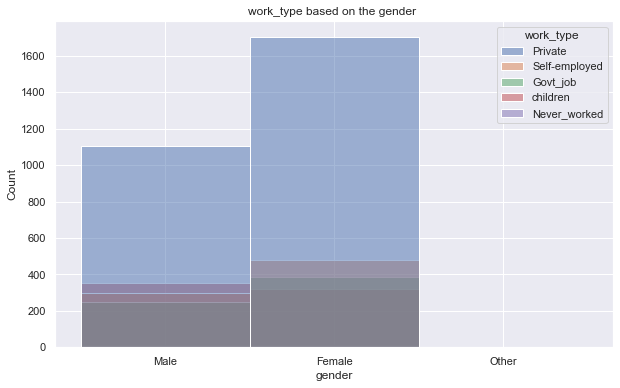

In [53]:
plt.figure(figsize=(10, 6))
plt.title("work_type based on the gender ")
sns.histplot(x="gender", hue="work_type", data=dataset)
plt.show()

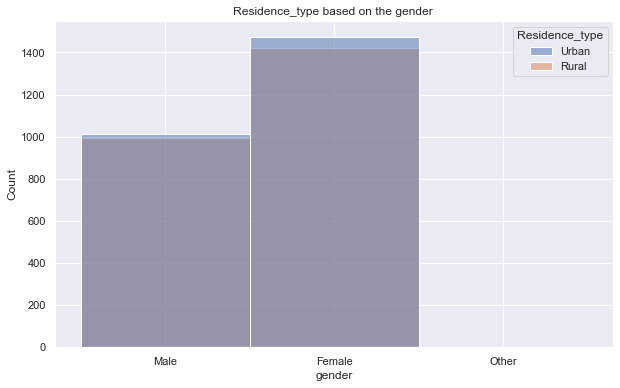

In [54]:
plt.figure(figsize=(10, 6))
plt.title("Residence_type based on the gender ")
sns.histplot(x="gender", hue="Residence_type", data=dataset)
plt.show()

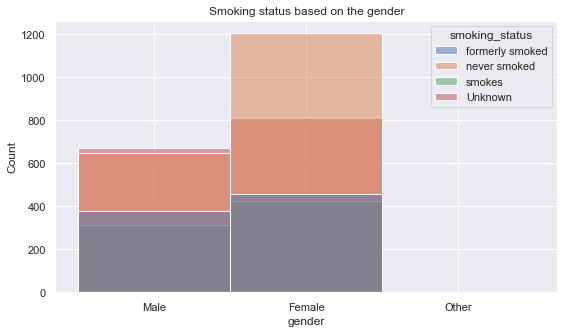

In [55]:
plt.figure(figsize=(9, 5))
plt.title("Smoking status based on the gender")
sns.histplot(x="gender", hue="smoking_status", data=dataset)
plt.show()

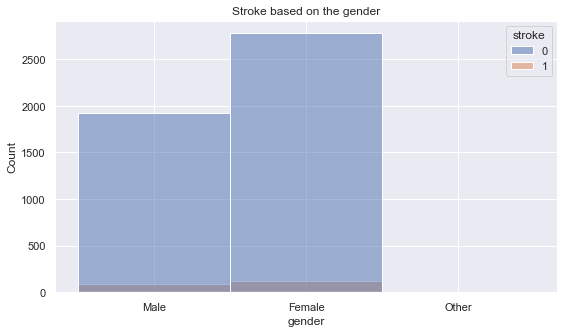

In [56]:
plt.figure(figsize=(9, 5))
plt.title("Stroke based on the gender")
sns.histplot(x="gender", hue="stroke", data=dataset)
plt.show()

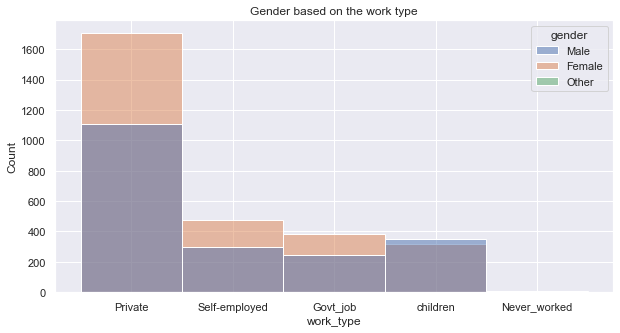

In [57]:
plt.figure(figsize=(10, 5))
plt.title("Gender based on the work type")
sns.histplot(x="work_type", hue="gender", data=dataset)
plt.show()

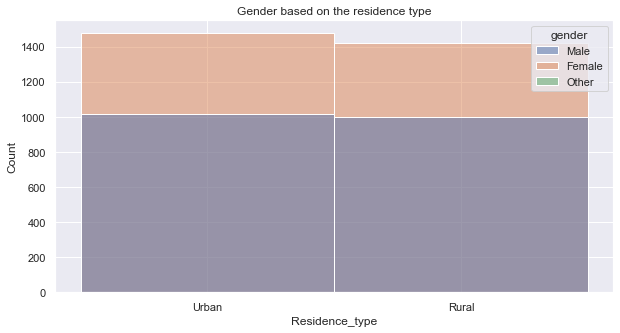

In [58]:
plt.figure(figsize=(10, 5))
plt.title("Gender based on the residence type")
sns.histplot(x="Residence_type", hue="gender", data=dataset)
plt.show()

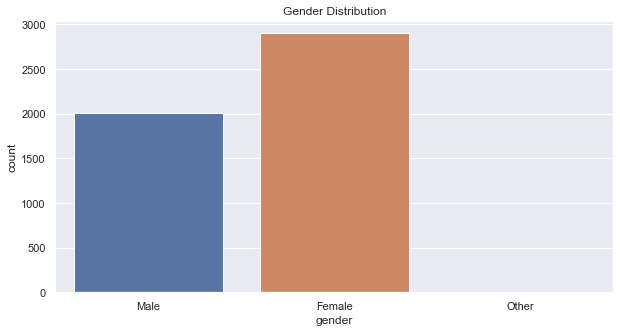

In [59]:
plt.figure(figsize=(10, 5))
sns.countplot(x=dataset['gender'])
plt.title("Gender Distribution")
plt.show()

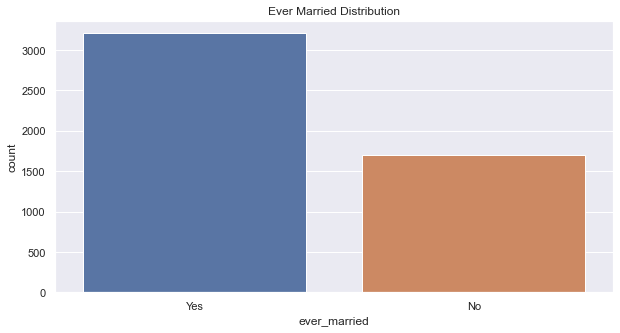

In [60]:
plt.figure(figsize=(10, 5))
sns.countplot(x=dataset['ever_married'])
plt.title("Ever Married Distribution")
plt.show()

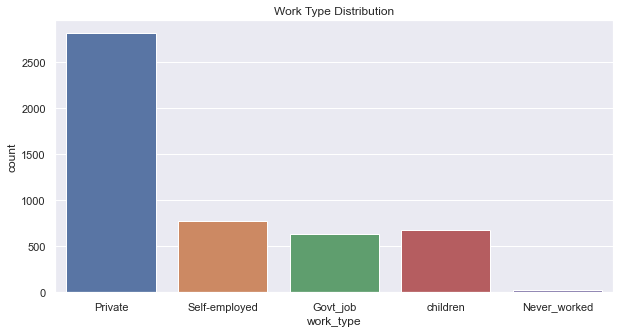

In [61]:
plt.figure(figsize=(10, 5))
sns.countplot(x=dataset['work_type'])
plt.title("Work Type Distribution")
plt.show()

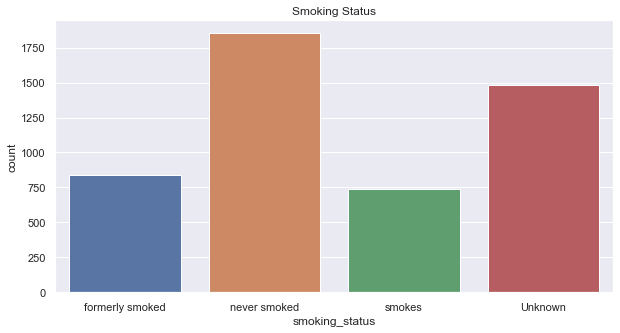

In [62]:
plt.figure(figsize=(10, 5))
sns.countplot(x=dataset['smoking_status'])
plt.title("Smoking Status")
plt.show()

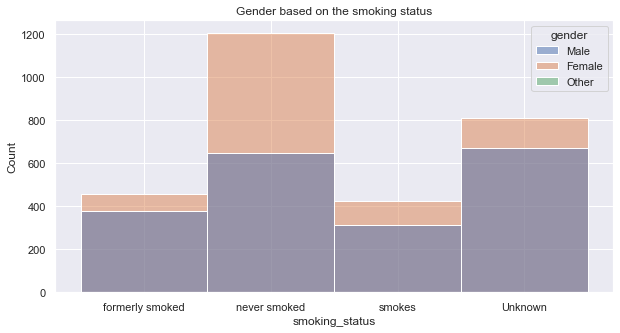

In [63]:
plt.figure(figsize=(10, 5))
plt.title("Gender based on the smoking status")
sns.histplot(x="smoking_status", hue="gender", data=dataset)
plt.show()

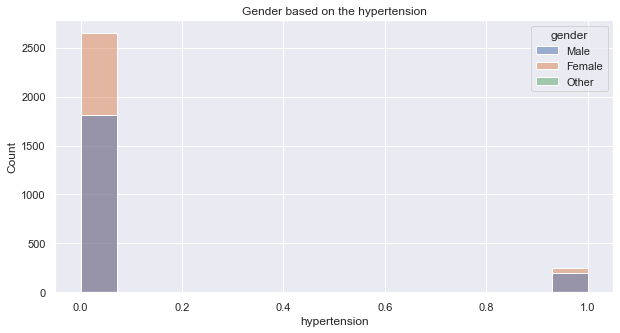

In [64]:
plt.figure(figsize=(10, 5))
plt.title("Gender based on the hypertension")
sns.histplot(x="hypertension", hue="gender", data=dataset)
plt.show()

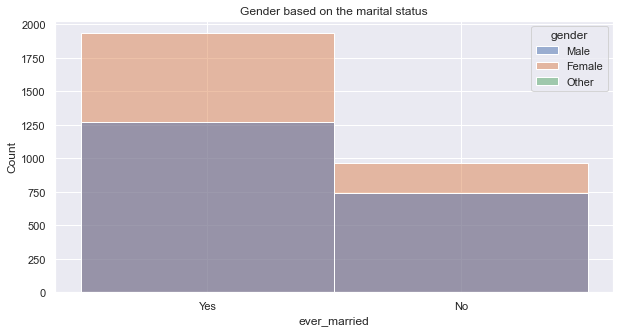

In [65]:
plt.figure(figsize=(10, 5))
plt.title("Gender based on the marital status")
sns.histplot(x="ever_married", hue="gender", data=dataset)
plt.show()

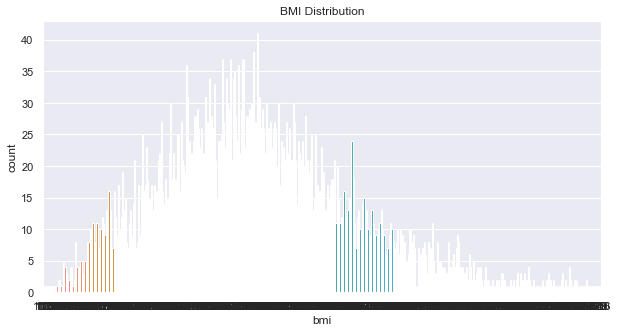

In [66]:
plt.figure(figsize=(10, 5))
sns.countplot(x=dataset['bmi'])
plt.title("BMI Distribution")
plt.show()

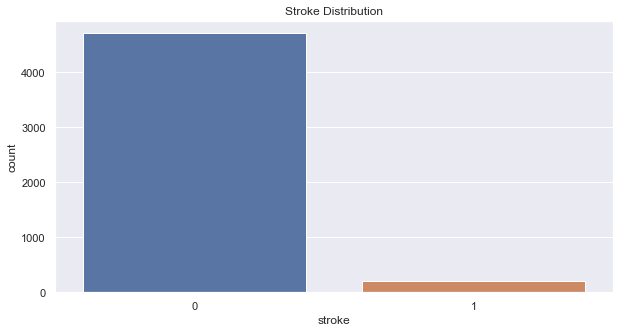

In [67]:
plt.figure(figsize=(10, 5))
sns.countplot(x=dataset['stroke'])
plt.title("Stroke Distribution")
plt.show()

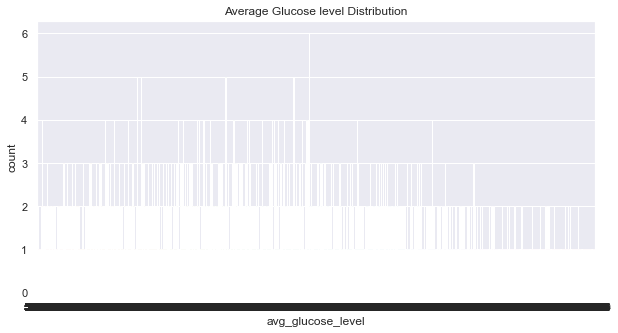

In [68]:
plt.figure(figsize=(10, 5))
sns.countplot(x=dataset['avg_glucose_level'])
plt.title("Average Glucose level Distribution")
plt.show()

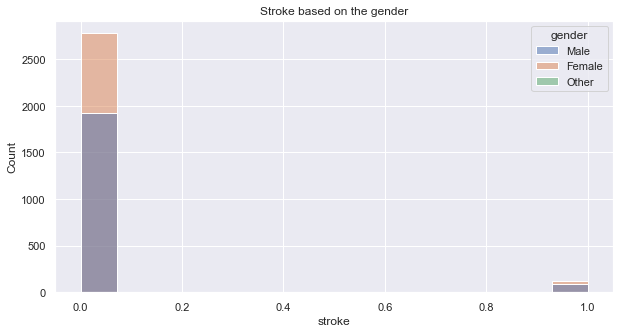

In [69]:
plt.figure(figsize=(10, 5))
plt.title("Stroke based on the gender")
sns.histplot(x="stroke", hue="gender", data=dataset)
plt.show()

Text(0.5, 1.0, 'Average glucose level by stroke histogram')

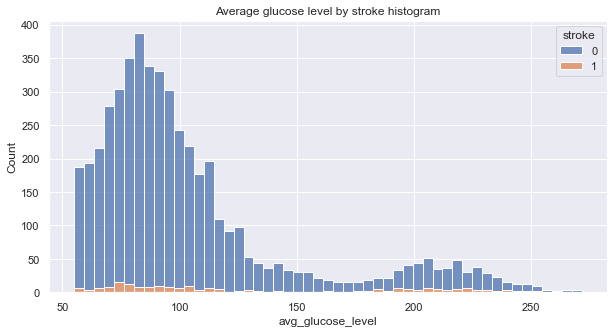

In [70]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data=dataset, x='avg_glucose_level', hue='stroke', multiple='stack')
plt.title('Average glucose level by stroke histogram')

Text(0.5, 1.0, 'BMI by stroke histogram')

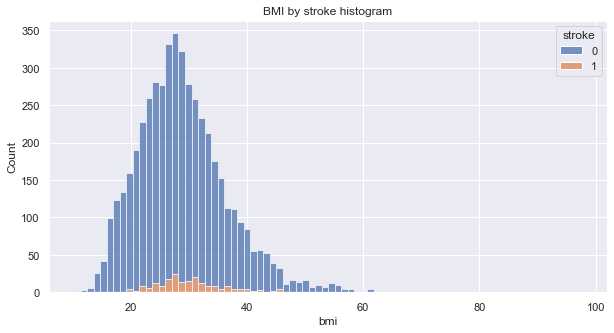

In [71]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data=dataset, x='bmi', hue='stroke', multiple='stack')
plt.title('BMI by stroke histogram')

Text(0.5, 1.0, 'The distribution of average glucose level on gender')

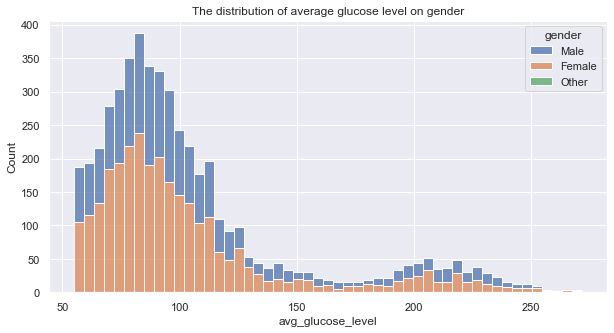

In [72]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data=dataset, x='avg_glucose_level', hue='gender', multiple='stack')
plt.title('The distribution of average glucose level on gender')

Text(0.5, 1.0, 'Work type by stroke histogram')

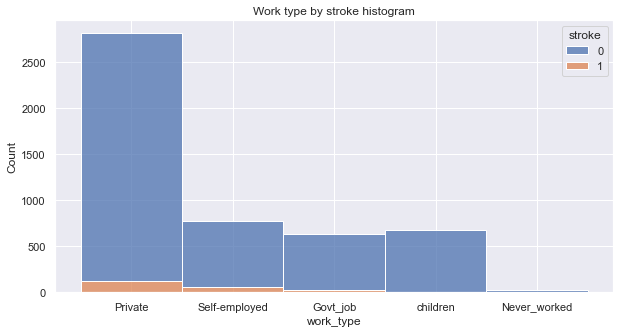

In [73]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data=dataset, x='work_type', hue='stroke', multiple='stack')
plt.title('Work type by stroke histogram')

Text(0.5, 1.0, 'Smoking status by stroke histogram')

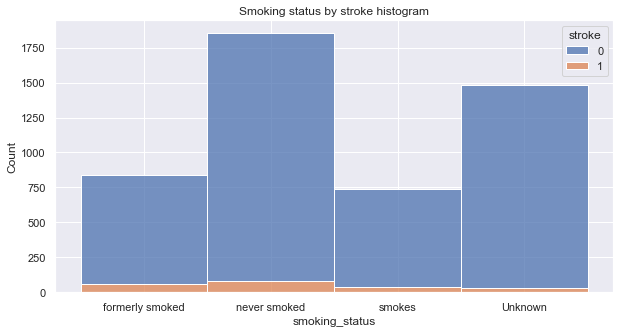

In [74]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data=dataset, x='smoking_status', hue='stroke', multiple='stack')
plt.title('Smoking status by stroke histogram')

Text(0.5, 1.0, 'The distribution of bmi base on smoking status')

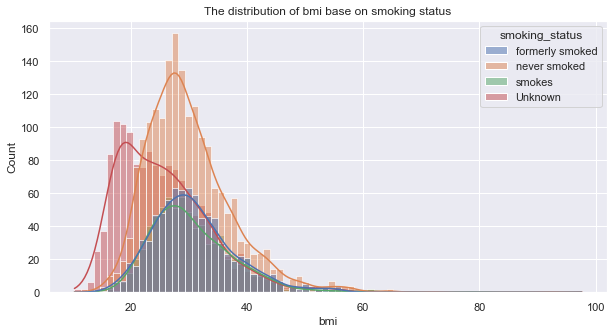

In [75]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data=dataset, x='bmi', hue='smoking_status', multiple='layer', kde=True)
plt.title('The distribution of bmi base on smoking status')

Text(0.5, 1.0, 'The distribution of bmi base on gender')

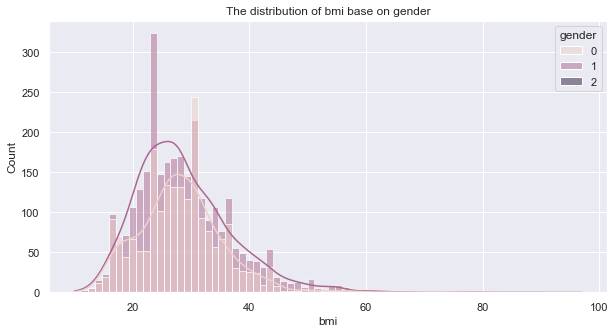

In [105]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data=dataset, x='bmi', hue='gender', multiple='layer', kde=True)
plt.title('The distribution of bmi base on gender')

Text(0.5, 1.0, 'The distribution of bmi base on smoking status')

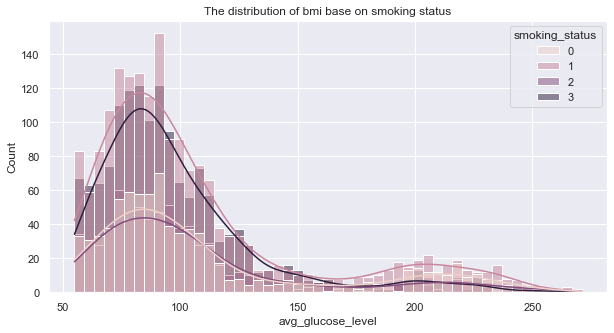

In [104]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data=dataset, x='avg_glucose_level', hue='smoking_status', multiple='layer', kde=True)
plt.title('The distribution of bmi base on smoking status')

Text(0.5, 1.0, 'Percentage of married people')

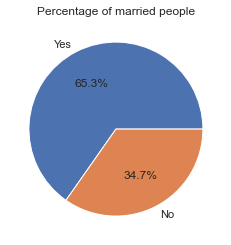

In [77]:
plt.pie(dataset['ever_married'].value_counts(), labels=dataset['ever_married'].unique(), autopct='%1.1f%%');
plt.title('Percentage of married people')

Text(0.5, 1.0, 'Percentage of types of work')

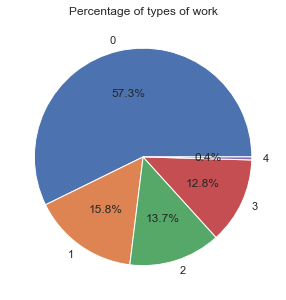

In [103]:
plt.figure(figsize=(10,5))
plt.pie(dataset['work_type'].value_counts(), labels=dataset['work_type'].unique(), autopct='%1.1f%%');
plt.title('Percentage of types of work')

Text(0.5, 1.0, 'Percentage of residence types')

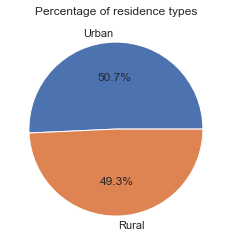

In [79]:
plt.pie(dataset['Residence_type'].value_counts(), labels=dataset['Residence_type'].unique(), autopct='%1.1f%%');
plt.title('Percentage of residence types')

Text(0.5, 1.0, 'Percentage of smoking status')

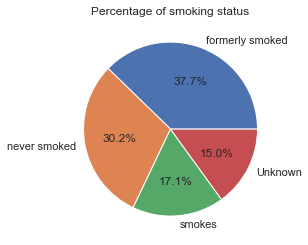

In [80]:
plt.pie(dataset['smoking_status'].value_counts(), labels=dataset['smoking_status'].unique(), autopct='%1.1f%%');
plt.title('Percentage of smoking status')

Text(0.5, 1.0, 'Percentage of hypertension')

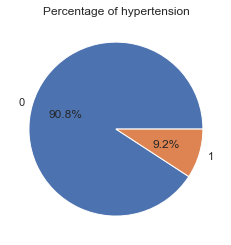

In [81]:
plt.pie(dataset['hypertension'].value_counts(), labels=dataset['hypertension'].unique(), autopct='%1.1f%%');
plt.title('Percentage of hypertension')

Text(0.5, 1.0, 'Percentage of heart disease')

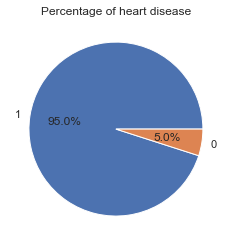

In [82]:
plt.pie(dataset['heart_disease'].value_counts(), labels=dataset['heart_disease'].unique(), autopct='%1.1f%%');
plt.title('Percentage of heart disease')

Text(0.5, 1.0, 'Percentage of stroke')

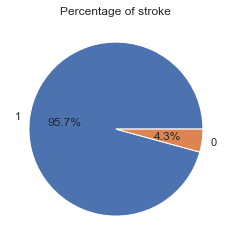

In [83]:
plt.pie(dataset['stroke'].value_counts(), labels=dataset['stroke'].unique(), autopct='%1.1f%%');
plt.title('Percentage of stroke')

Text(0.5, 1.0, 'Percentage of gender')

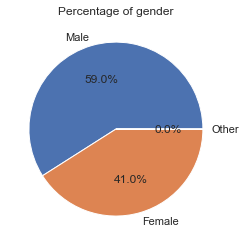

In [84]:
plt.pie(dataset['gender'].value_counts(), labels=dataset['gender'].unique(), autopct='%1.1f%%');
plt.title('Percentage of gender')

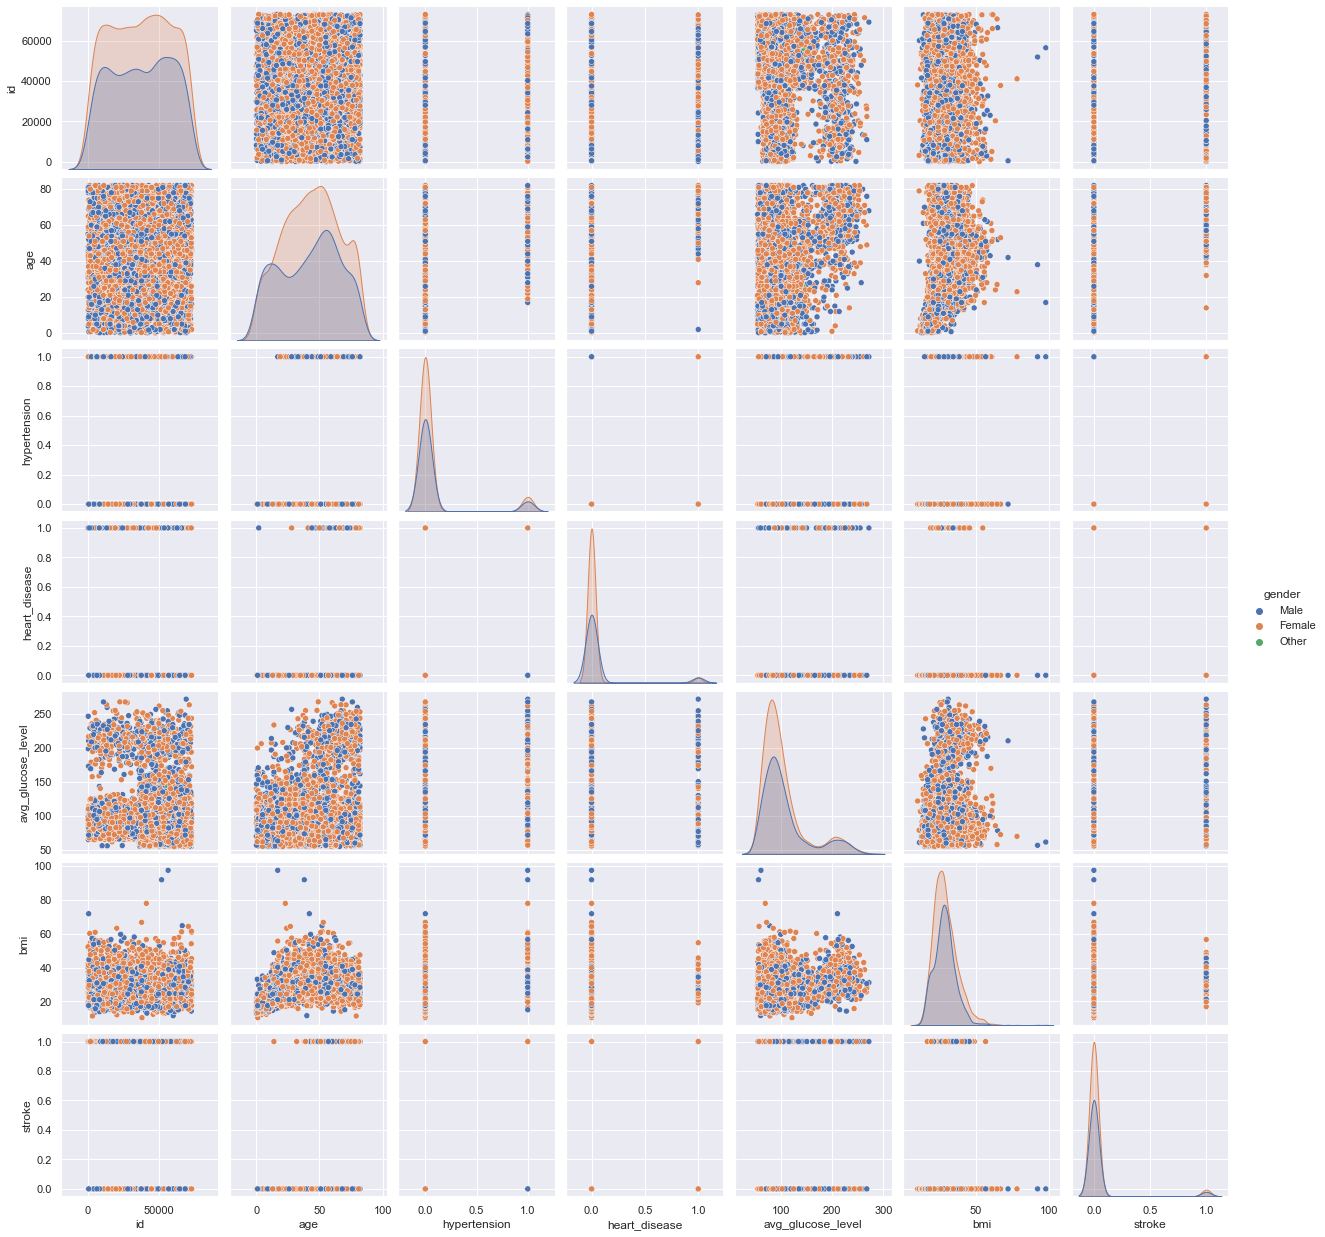

In [85]:
sns.pairplot(data, hue='gender')
plt.show()

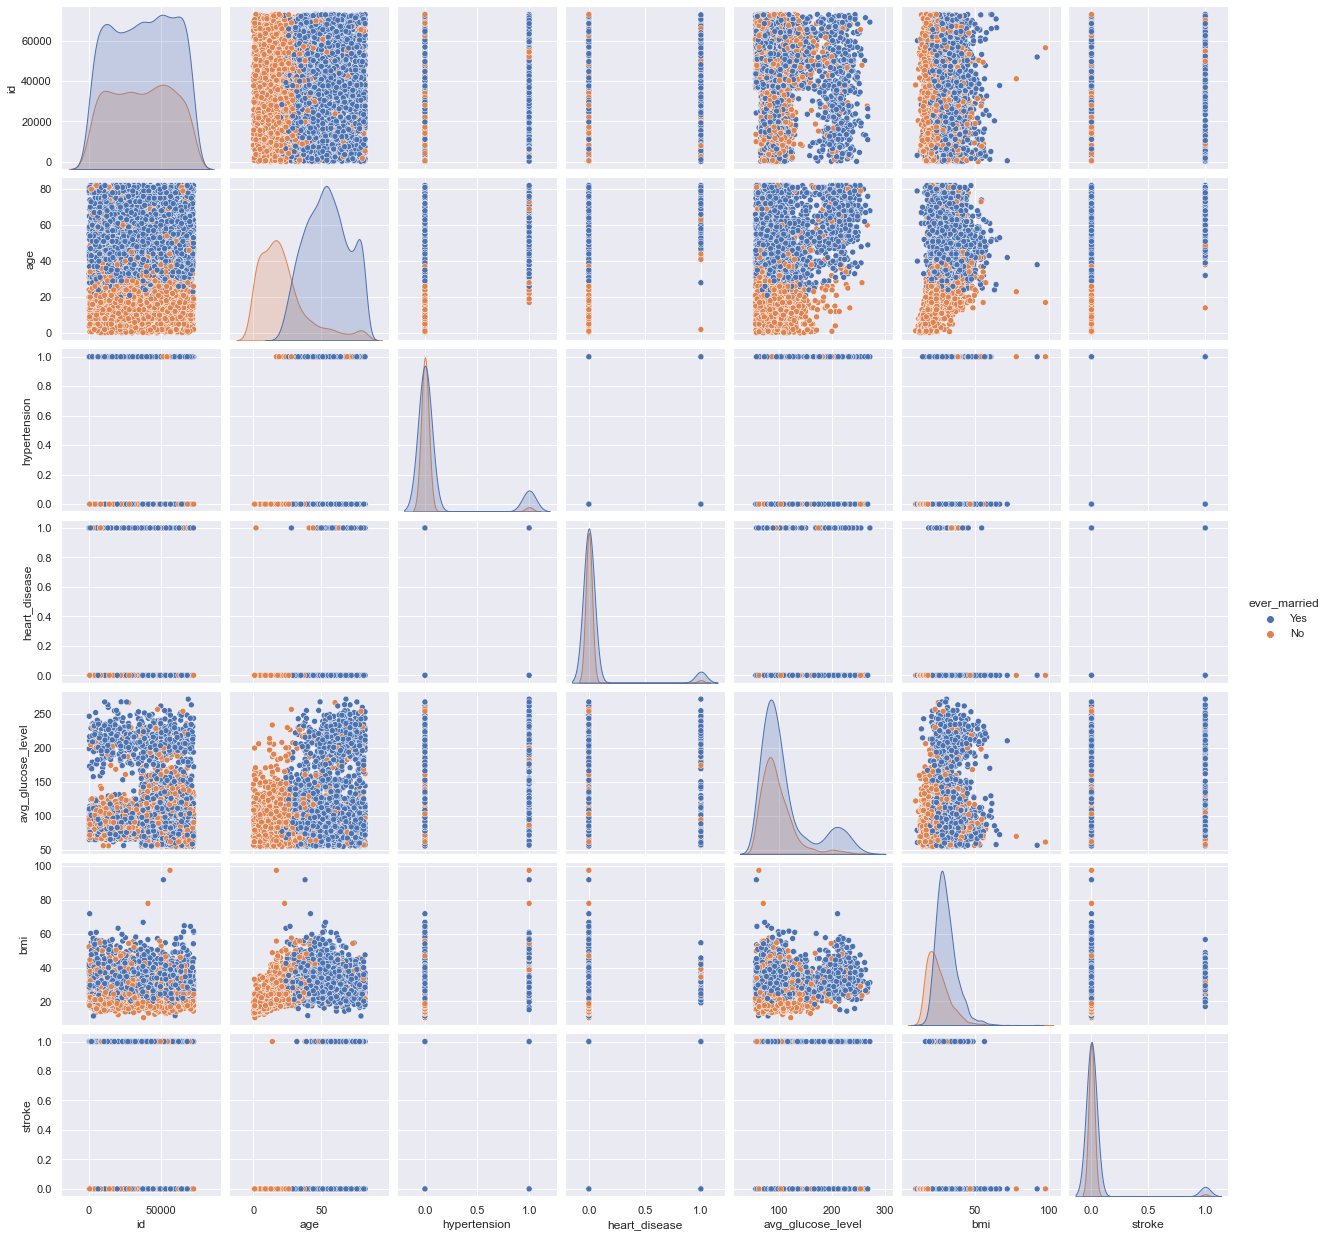

In [86]:
sns.pairplot(data, hue='ever_married')
plt.show()

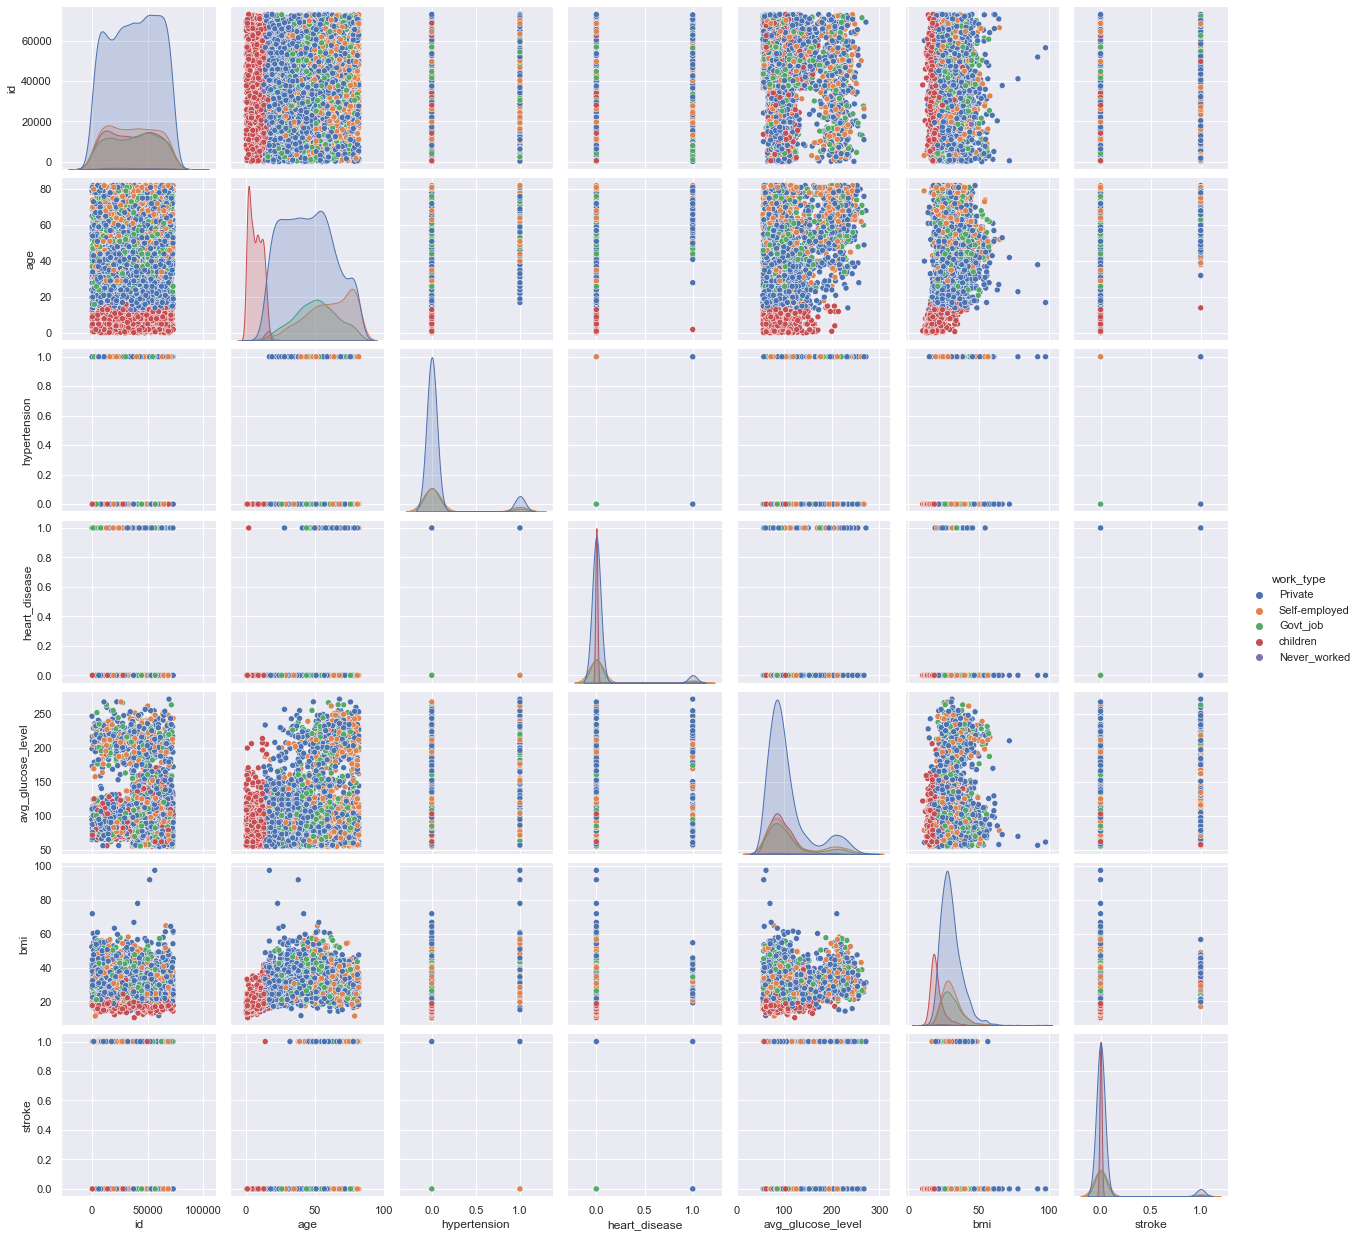

In [87]:
sns.pairplot(data, hue='work_type')
plt.show()

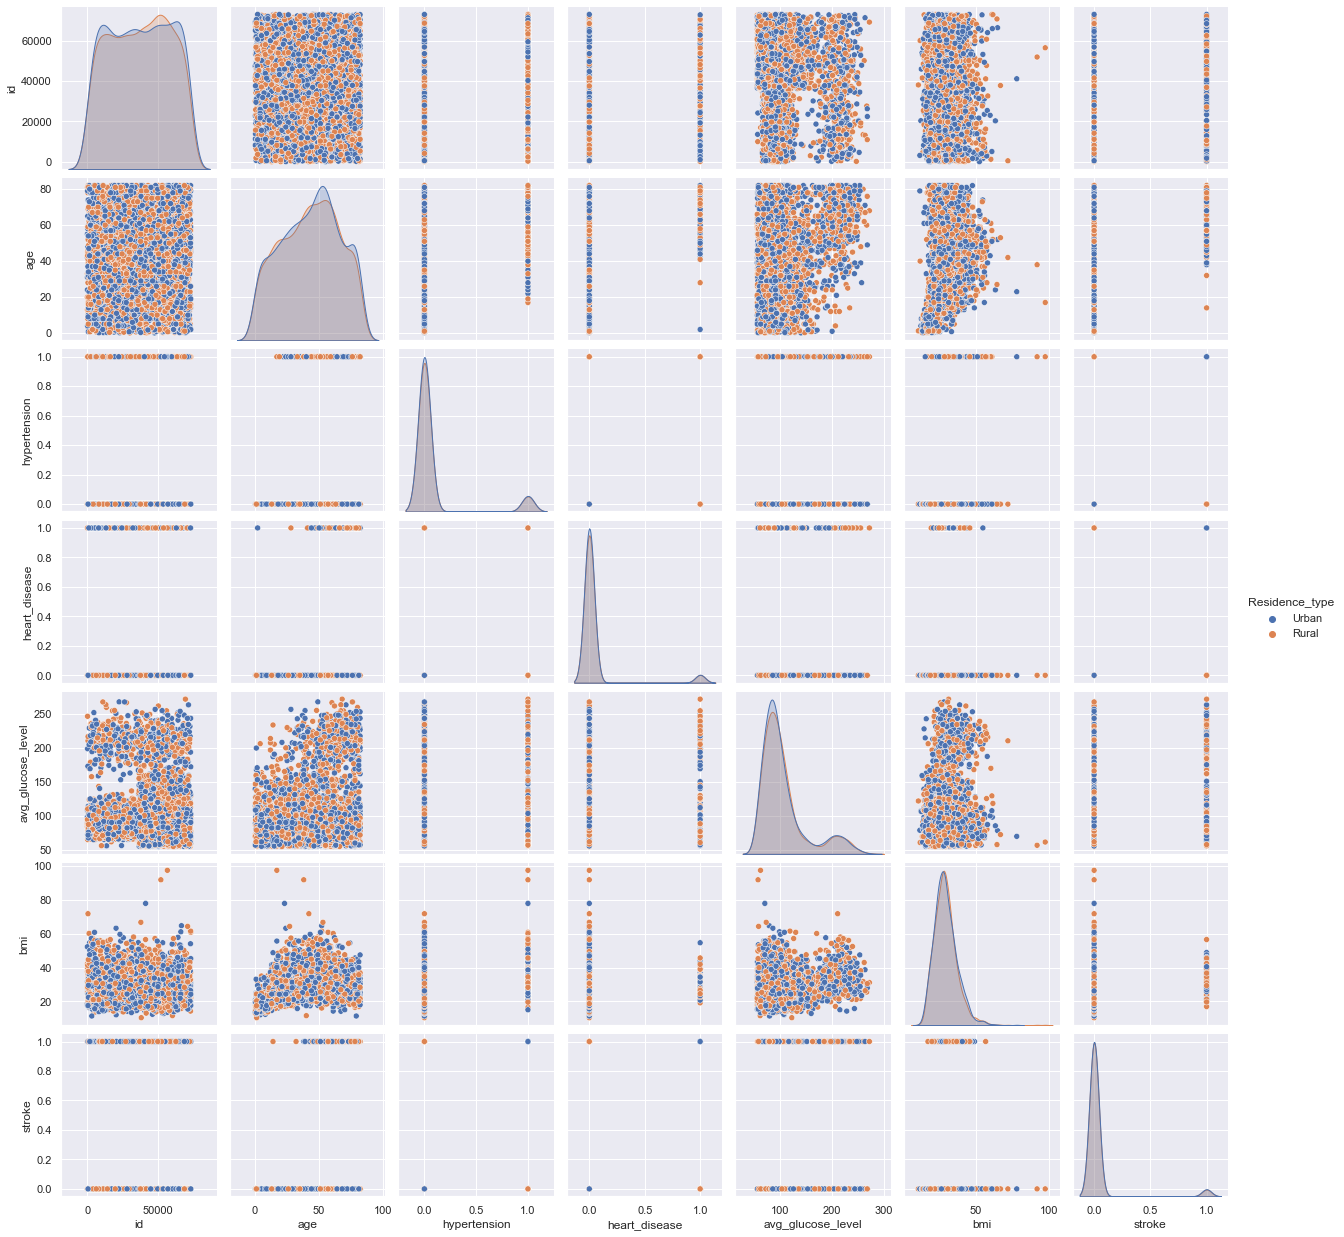

In [88]:
sns.pairplot(data, hue='Residence_type')
plt.show()

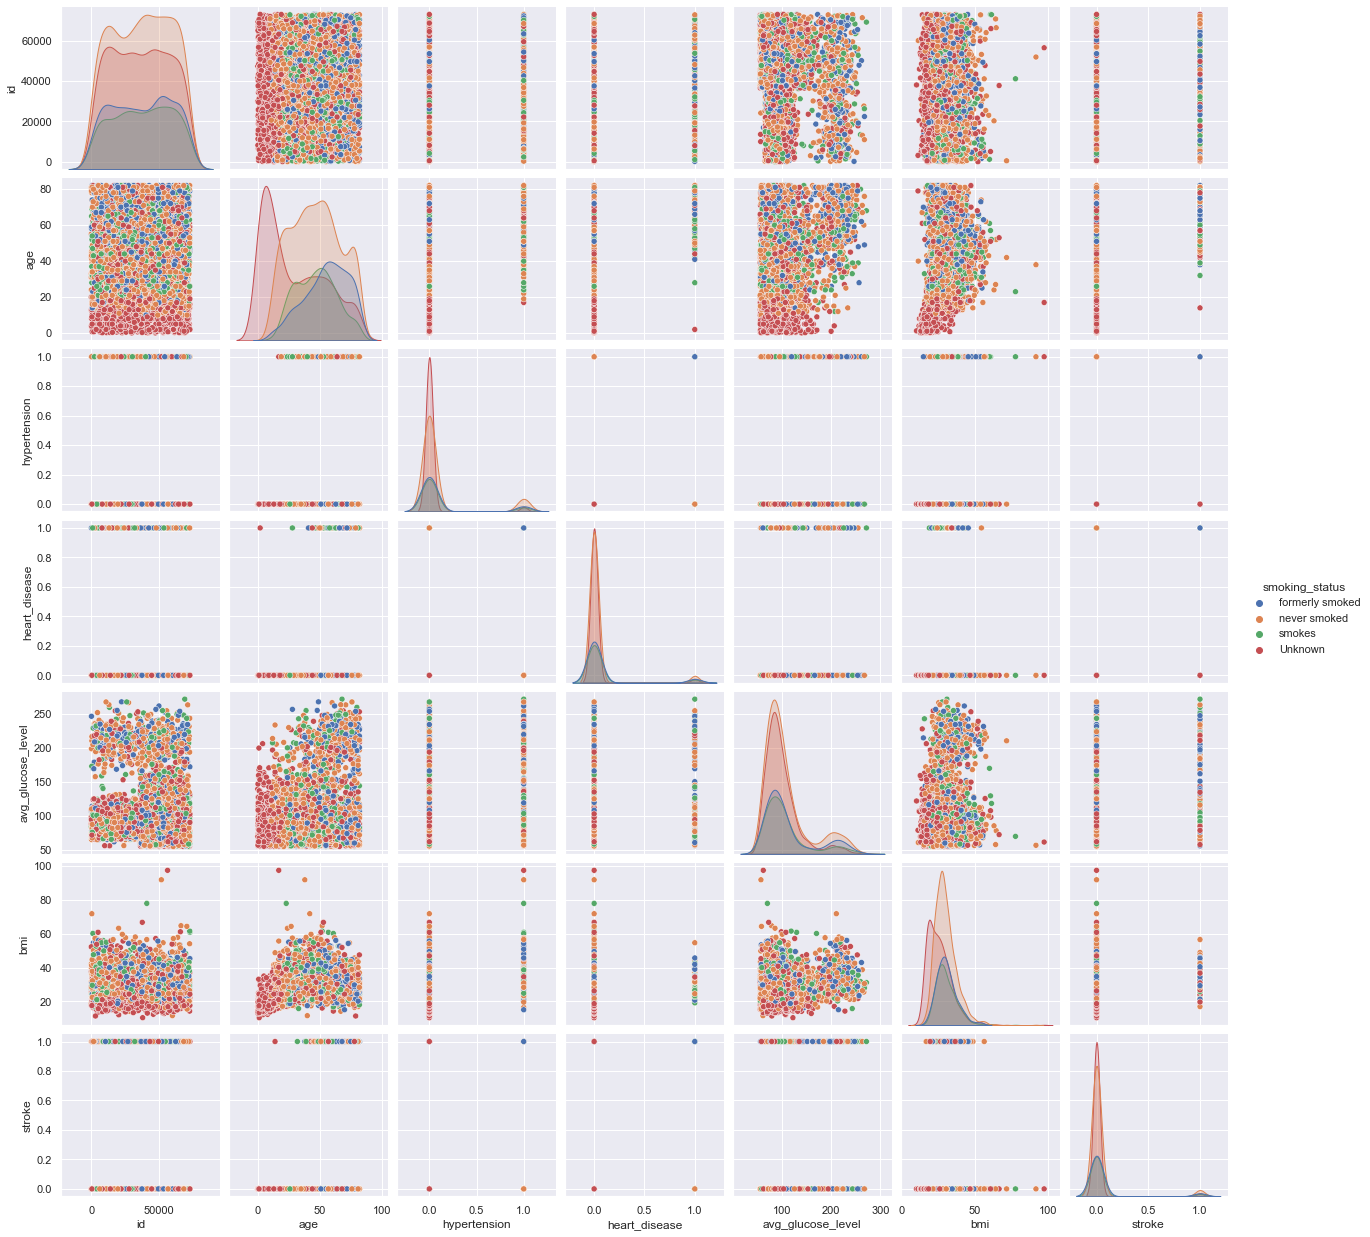

In [89]:
sns.pairplot(data, hue='smoking_status')
plt.show()

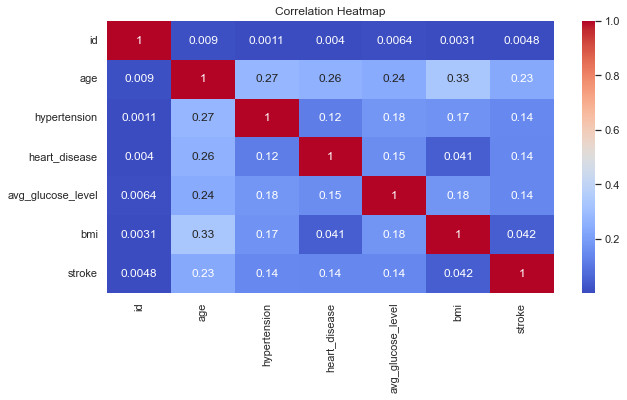

In [90]:
plt.figure(figsize=(10, 5))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [91]:
# 9.Convert some of the healthcare data stroke from categorical to numerical value

In [92]:
dataset['gender']=dataset['gender'].replace(['Male','Female','Other'],[0,1,2])
dataset['ever_married']=dataset['ever_married'].replace(['Yes','No'],[0,1])
dataset['work_type']=dataset['work_type'].replace(['Private','Self-employed','Govt_job','children','Never_worked'],[0,1,2,3,4])
dataset['Residence_type']=dataset['Residence_type'].replace(['Urban','Rural'],[0,1])
dataset['smoking_status']=dataset['smoking_status'].replace(['formerly smoked','never smoked','smokes','Unknown'],[0,1,2,3])
dataset['avg_glucose_level']=dataset['avg_glucose_level'].astype(int)
dataset['bmi']=dataset['bmi'].astype(int)
dataset['age']=dataset['age'].astype(int)

In [93]:
# 10.Explore the new healthcare data stroke after cleaning

In [94]:
dataset.shape

(4909, 12)

In [95]:
dataset.head()

id  gender  age  hypertension  heart_disease  ever_married  work_type  \
0   9046       0   67             0              1             0          0   
2  31112       0   80             0              1             0          0   
3  60182       1   49             0              0             0          0   
4   1665       1   79             1              0             0          1   
5  56669       0   81             0              0             0          0   

   Residence_type  avg_glucose_level  bmi  smoking_status  stroke  
0               0                228   36               0       1  
2               1                105   32               1       1  
3               0                171   34               2       1  
4               1                174   24               1       1  
5               0                186   29               0       1

In [96]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 4909 non-null   int64
 1   gender             4909 non-null   int64
 2   age                4909 non-null   int64
 3   hypertension       4909 non-null   int64
 4   heart_disease      4909 non-null   int64
 5   ever_married       4909 non-null   int64
 6   work_type          4909 non-null   int64
 7   Residence_type     4909 non-null   int64
 8   avg_glucose_level  4909 non-null   int64
 9   bmi                4909 non-null   int64
 10  smoking_status     4909 non-null   int64
 11  stroke             4909 non-null   int64
dtypes: int64(12)
memory usage: 627.6 KB


In [97]:
dataset.describe()

id       gender          age  hypertension  heart_disease  \
count   4909.000000  4909.000000  4909.000000   4909.000000    4909.000000   
mean   37064.313506     0.590548    42.854145      0.091872       0.049501   
std    20995.098457     0.492197    22.575986      0.288875       0.216934   
min       77.000000     0.000000     0.000000      0.000000       0.000000   
25%    18605.000000     0.000000    25.000000      0.000000       0.000000   
50%    37608.000000     1.000000    44.000000      0.000000       0.000000   
75%    55220.000000     1.000000    60.000000      0.000000       0.000000   
max    72940.000000     2.000000    82.000000      1.000000       1.000000   

       ever_married    work_type  Residence_type  avg_glucose_level  \
count   4909.000000  4909.000000     4909.000000        4909.000000   
mean       0.347321     0.842534        0.492768         104.816052   
std        0.476167     1.124057        0.499999          44.417384   
min        0.000000     0.000000        0.000000          55.000000   
25%        0.000000     0.000000        0.000000          77.000000   
50%        0.000000     0.000000        0.000000          91.000000   
75%        1.000000     2.000000        1.000000         113.000000   
max        1.000000     4.000000        1.000000         271.000000   

               bmi  smoking_status       stroke  
count  4909.000000     4909.000000  4909.000000  
mean     28.448564        1.583826     0.042575  
std       7.843834        1.090146     0.201917  
min      10.000000        0.000000     0.000000  
25%      23.000000        1.000000     0.000000  
50%      28.000000        1.000000     0.000000  
75%      33.000000        3.000000     0.000000  
max      97.000000        3.000000     1.000000

In [98]:
dataset.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [197]:
data = dataset.drop('id', axis=1)

In [199]:
print(data)

      gender  age  hypertension  heart_disease  ever_married  work_type  \
0          0   67             0              1             0          0   
2          0   80             0              1             0          0   
3          1   49             0              0             0          0   
4          1   79             1              0             0          1   
5          0   81             0              0             0          0   
...      ...  ...           ...            ...           ...        ...   
5104       1   13             0              0             1          3   
5106       1   81             0              0             0          1   
5107       1   35             0              0             0          1   
5108       0   51             0              0             0          0   
5109       1   44             0              0             0          2   

      Residence_type  avg_glucose_level  bmi  smoking_status  stroke  
0                  0        

In [200]:
# 11.Determining the class feature and input features 

In [201]:
X = dataset.iloc[:, [1, 2, 3, 4, 8, 9, 10]].values 
y = dataset.iloc[:, 11].values 

In [202]:
# 12.Splitting the dataset into the Training set and the Test set

In [203]:
# 13.Splitting the dataset into the Training set and the Test set sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [204]:
# 13. Scalling features

In [205]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train_s=sc.fit_transform(X_train)
X_test_s=sc.transform(X_test)

In [206]:
# 14.Training the model

In [207]:
from sklearn.neighbors import KNeighborsClassifier 
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train_s, y_train)

KNeighborsClassifier()

In [208]:
# Predicting the Test set results 
y_pred=classifier.predict(X_test_s)
print(y_pred)

[0 0 0 ... 0 0 0]


In [209]:
print(y_test)

[0 0 0 ... 0 0 0]


In [210]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('--------------------------------------')
result=metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.96


Confusion Matrix:
[[1411    7]
 [  53    2]] 


--------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1418
           1       0.22      0.04      0.06        55

    accuracy                           0.96      1473
   macro avg       0.59      0.52      0.52      1473
weighted avg       0.94      0.96      0.94      1473



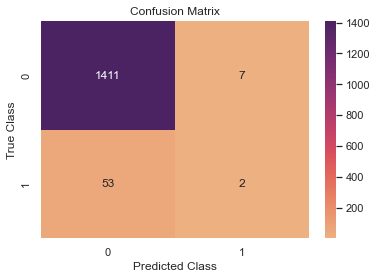

In [211]:
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix",fontsize=12)

plt.show()

In [212]:
# 1.Import the necessary libraries for the Decision Tree assessment on top of the existing libraries used for the KNN method 

In [213]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

plt.style.use('ggplot')

In [214]:
# 15.Change the stroke label(1 for stroke, 0 for normal)

In [215]:
data['stroke'] = ['Stroke' if i == 1 else 'Normal' for i in data['stroke']]

In [216]:
# 16.Visualization of the stroke data after labelling 

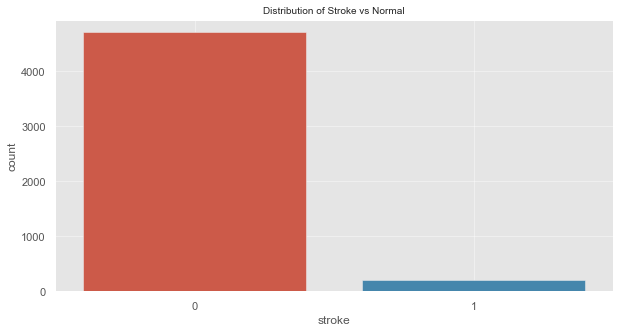

In [217]:
plt.figure(figsize=(10,5))
sns.countplot(data=dataset, x='stroke')
plt.title('Distribution of Stroke vs Normal', fontsize=10)
plt.grid(alpha=0.4)
plt.show()

In [218]:
categorical_feature=['gender', 'hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']

In [219]:
data[categorical_feature].head()

gender  hypertension  heart_disease  ever_married  work_type  \
0       0             0              1             0          0   
2       0             0              1             0          0   
3       1             0              0             0          0   
4       1             1              0             0          1   
5       0             0              0             0          0   

   Residence_type  smoking_status  
0               0               0  
2               1               1  
3               0               2  
4               1               1  
5               0               0

/Users/nelouazi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nelouazi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nelouazi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

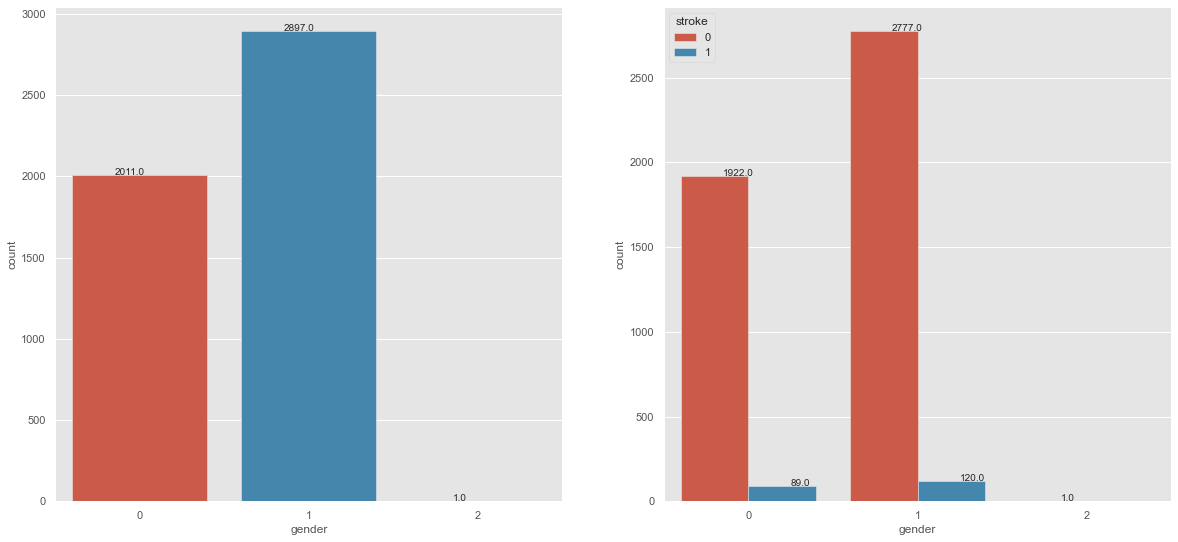

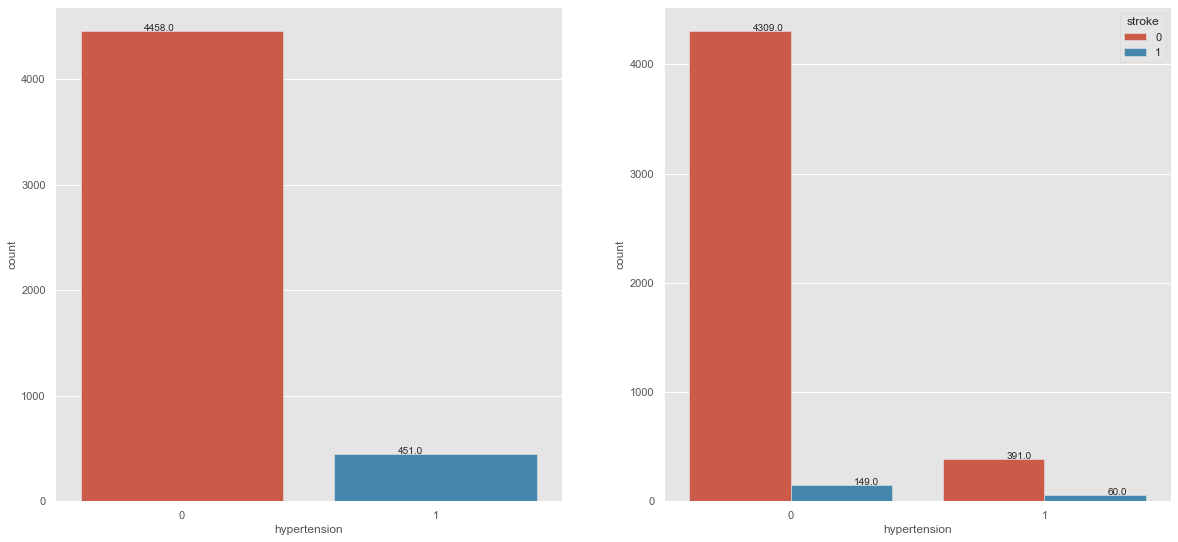

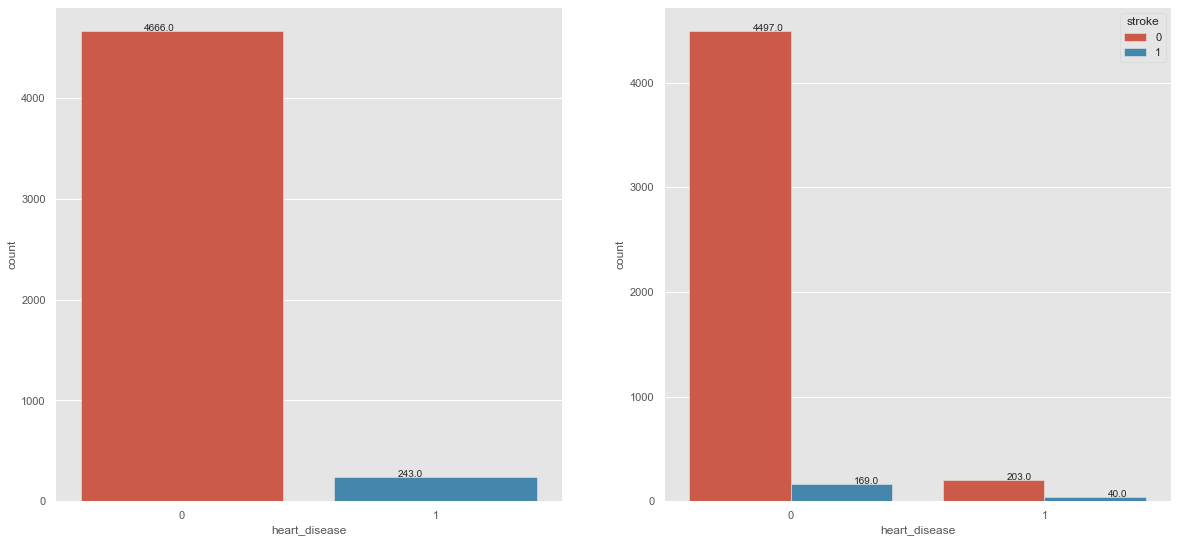

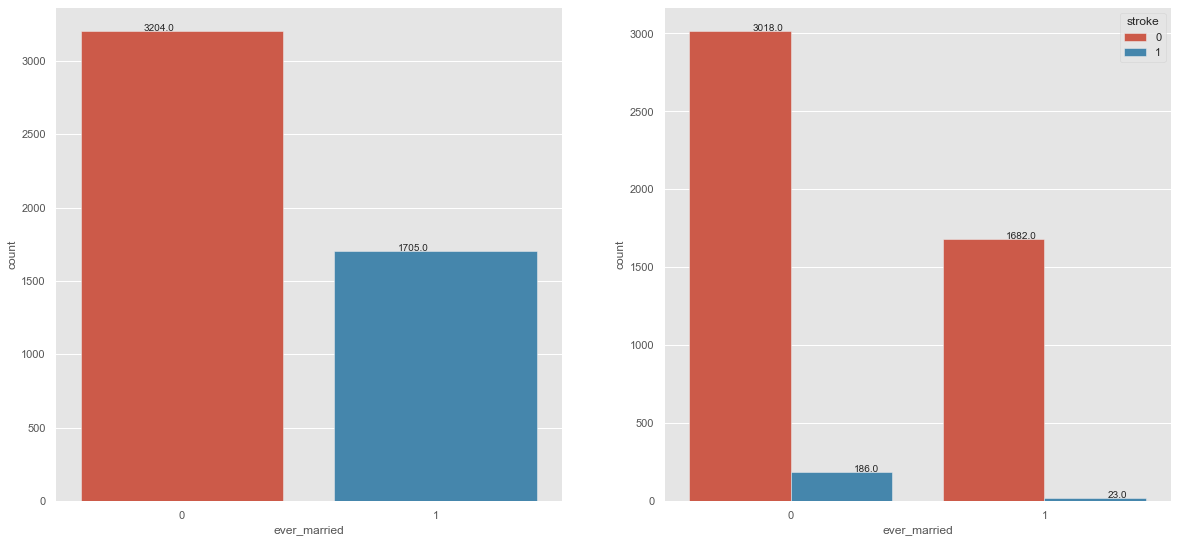

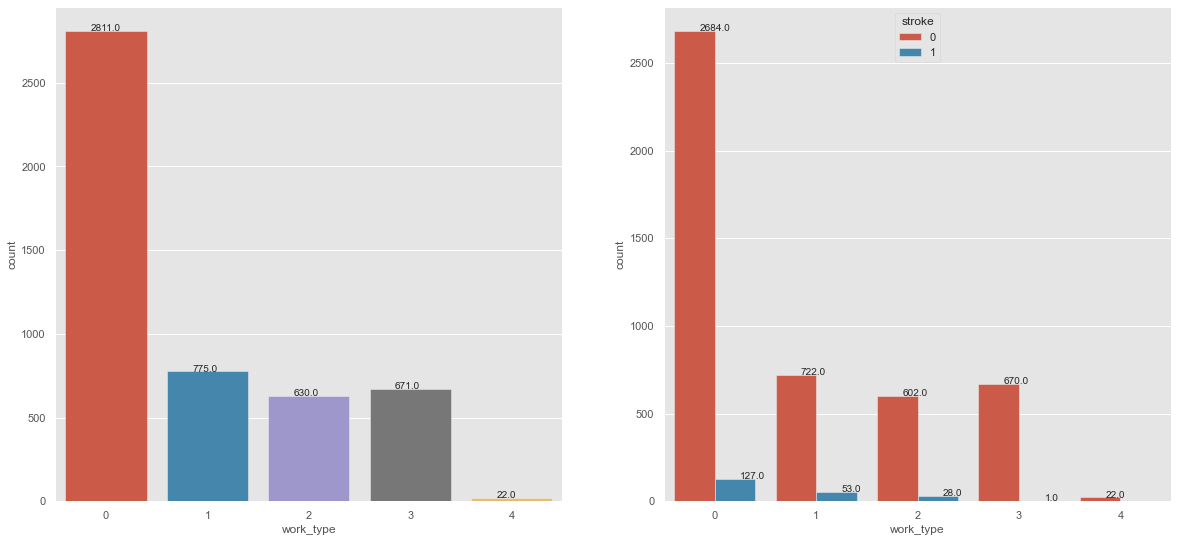

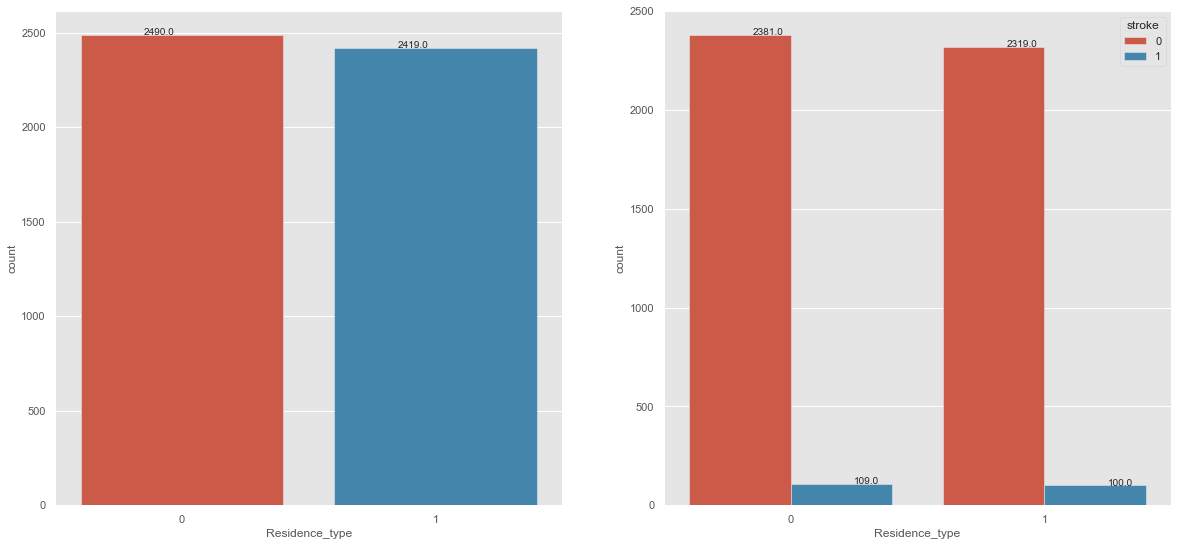

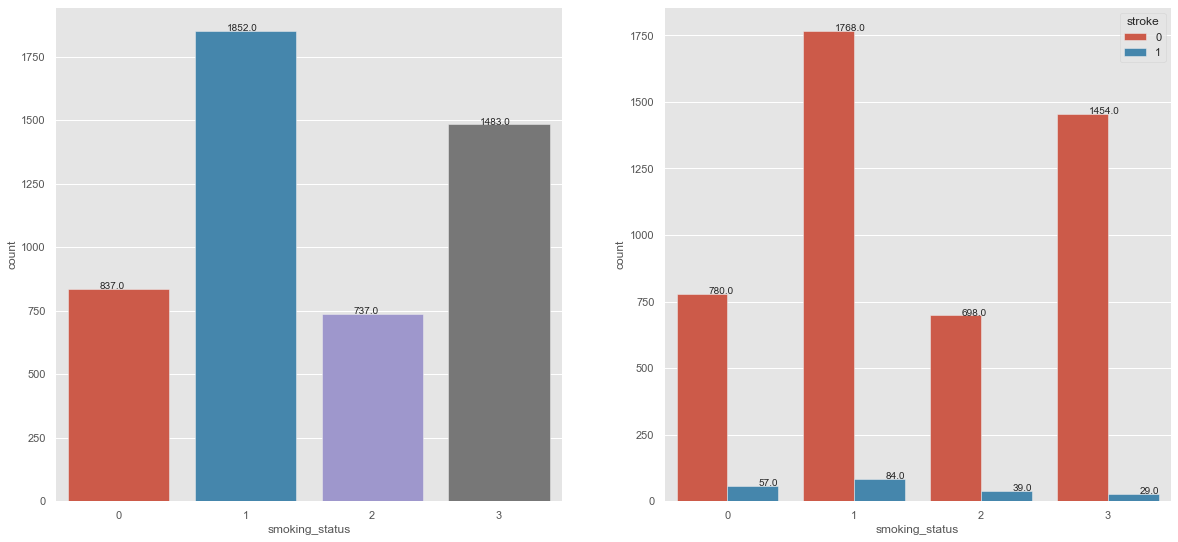

In [220]:
for feature in categorical_feature:
   plt.figure(figsize=(20,20))
   plt.subplot(2,2,1)
   ax=sns.countplot(dataset[feature],data=dataset)
   for p in ax.patches:
     ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

   plt.subplot(2,2,2)
   az=sns.countplot(dataset[feature],hue='stroke',data=dataset)
   for p in az.patches:
     az.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

In [221]:
numerical_feature=['age','avg_glucose_level','bmi']

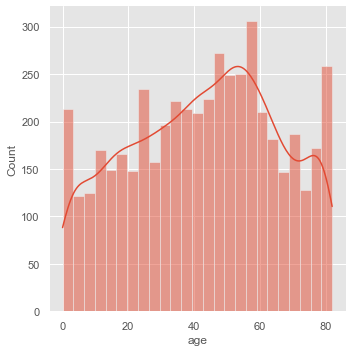

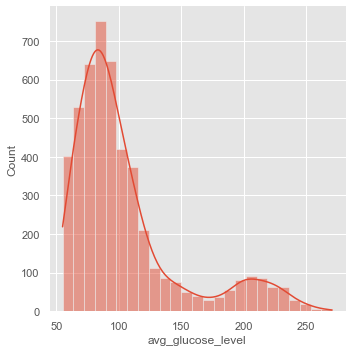

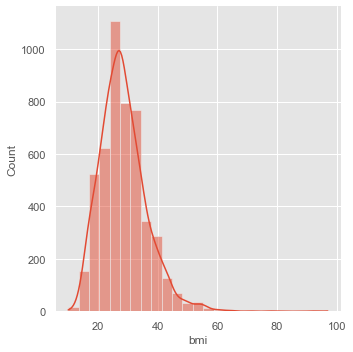

In [222]:
for feature in numerical_feature:
  sns.displot(dataset[feature],kde=True,bins=25)

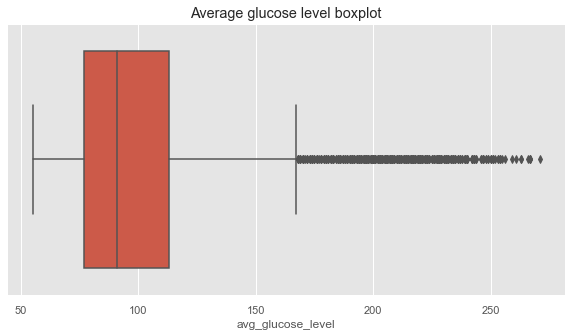

In [223]:
plt.figure(figsize=(10,5))
plt.title('Average glucose level boxplot')
sns.boxplot(x=dataset['avg_glucose_level']);

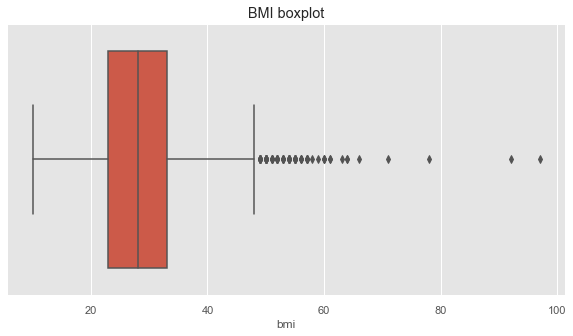

In [224]:
plt.figure(figsize=(10,5))
plt.title('BMI boxplot')
sns.boxplot(x=dataset['bmi']);

In [225]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [242]:
over = SMOTE(sampling_strategy = 1)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = dataset.loc[:,:'smoking_status']
t1 = dataset.loc[:,'stroke']

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({0: 2090, 1: 2090})

In [249]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.10, random_state = 2)

In [250]:
x_train_test = x_train.copy(deep = True)
x_train_test['stroke'] = y_train

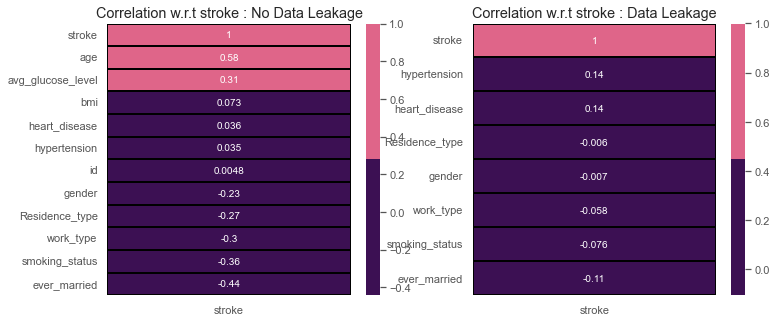

In [252]:
dataset.drop(columns = ['id'],inplace = True)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))
colors = ['#3C1053','#DF6589']

plt.subplot(1,2,1)
corr = x_train_test.corrwith(x_train_test['stroke']).sort_values(ascending = False).to_frame()
corr.columns = ['stroke']
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.3,linecolor = 'black');
plt.title('Correlation w.r.t stroke : No Data Leakage');

plt.subplot(1,2,2)
corr = dataset.drop(columns = ['age', 'avg_glucose_level', 'bmi']).corrwith(dataset['stroke']).sort_values(ascending = False).to_frame()
corr.columns = ['stroke']
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.3,linecolor = 'black');
plt.title('Correlation w.r.t stroke : Data Leakage');

In [253]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train_s=sc.fit_transform(x_train)
X_test_s=sc.transform(x_test)

In [254]:
from sklearn.neighbors import KNeighborsClassifier 
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train_s, y_train)

KNeighborsClassifier()

In [255]:
y_pred=classifier.predict(X_test_s)
print(y_pred)

[1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0
 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1
 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0
 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1
 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1
 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1
 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1
 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1
 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 0 0 1 0 1 0]


In [256]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('--------------------------------------')
result=metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.84


Confusion Matrix:
[[166  55]
 [ 10 187]] 


--------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.75      0.84       221
           1       0.77      0.95      0.85       197

    accuracy                           0.84       418
   macro avg       0.86      0.85      0.84       418
weighted avg       0.86      0.84      0.84       418



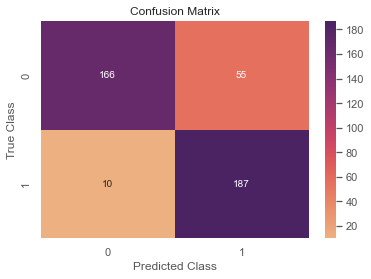

In [257]:
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix",fontsize=12)

plt.show()

In [258]:
from sklearn.tree import DecisionTreeClassifier 
classifier=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train_s, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [259]:
# Predicting the Test set results 
y_pred=classifier.predict(X_test_s)
print(y_pred)

[1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0
 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1
 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0
 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1
 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1
 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1
 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1
 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1
 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 0 0 1 0 1 0]


In [260]:
print(y_test)

1362    0
586     0
998     0
1561    0
171     0
       ..
371     0
3379    1
1695    0
3967    1
1267    0
Name: stroke, Length: 418, dtype: int64


In [261]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('--------------------------------------')
result=metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.88


Confusion Matrix:
[[189  32]
 [ 17 180]] 


--------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       221
           1       0.85      0.91      0.88       197

    accuracy                           0.88       418
   macro avg       0.88      0.88      0.88       418
weighted avg       0.89      0.88      0.88       418



In [262]:
from sklearn.tree import plot_tree

[Text(0.27000677977369425, 0.9807692307692307, 'X[2] <= -0.484\nentropy = 1.0\nsamples = 3762\nvalue = [1869, 1893]'),
 Text(0.02269170579029734, 0.9423076923076923, 'X[2] <= -0.946\nentropy = 0.268\nsamples = 1008\nvalue = [962, 46]'),
 Text(0.012519561815336464, 0.9038461538461539, 'X[9] <= -0.085\nentropy = 0.05\nsamples = 709\nvalue = [705, 4]'),
 Text(0.009389671361502348, 0.8653846153846154, 'entropy = 0.0\nsamples = 520\nvalue = [520, 0]'),
 Text(0.01564945226917058, 0.8653846153846154, 'X[9] <= 0.208\nentropy = 0.148\nsamples = 189\nvalue = [185, 4]'),
 Text(0.012519561815336464, 0.8269230769230769, 'X[8] <= -0.831\nentropy = 0.469\nsamples = 40\nvalue = [36, 4]'),
 Text(0.009389671361502348, 0.7884615384615384, 'X[6] <= 0.994\nentropy = 0.946\nsamples = 11\nvalue = [7, 4]'),
 Text(0.006259780907668232, 0.75, 'X[8] <= -0.871\nentropy = 0.544\nsamples = 8\nvalue = [7, 1]'),
 Text(0.003129890453834116, 0.7115384615384616, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.009

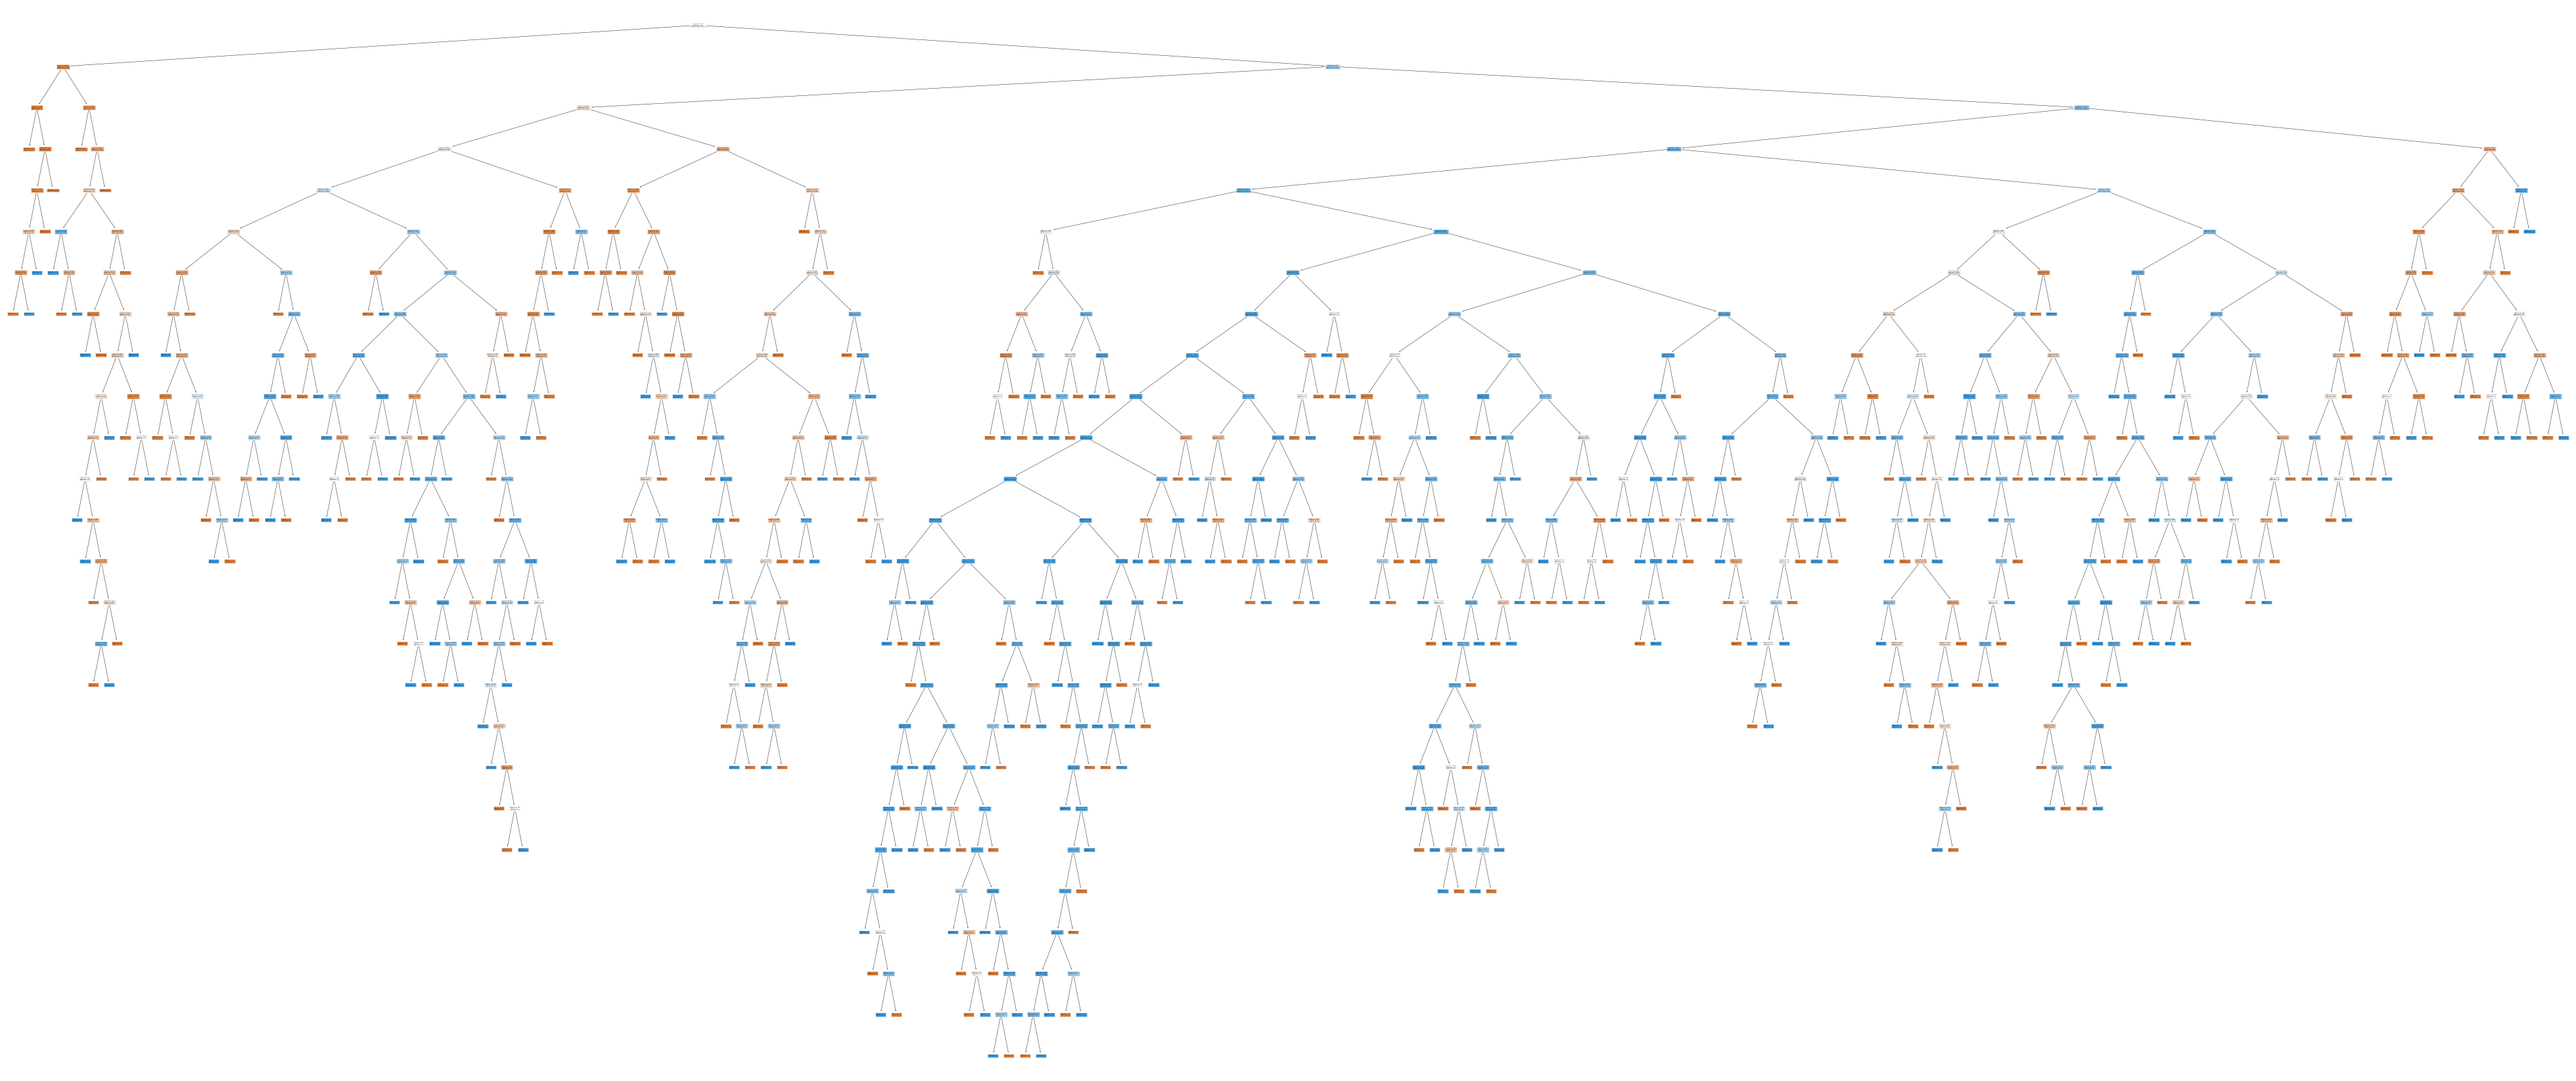

In [263]:
plt.figure(figsize=(70, 30))
plot_tree(classifier, filled=True)

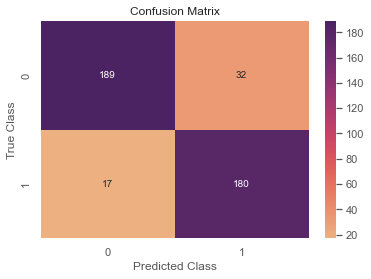

In [264]:
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix",fontsize=12)

plt.show()